# 1083 Albumin Analysis with Updated Dataset

### By: Ian Weimer

## Imports

In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from scipy import stats
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import make_column_transformer
import scipy.stats
pd.set_option('display.max_columns', None)
import phik
from phik import resources, report

## Preprocessing and Exploratory Data Analysis 

## Load Albumin Data

In [2]:
pwd

'C:\\Users\\Iweimer\\Desktop\\BB_Git\\1083-albumin-data-exploration\\ML\\K85_Cohort'

In [3]:
df_alb = pd.read_csv('K85_cohort.csv', index_col=0)

In [4]:
df_alb.head()

personid                           encounterid  \
0  03c0445e-6ac7-441c-a5b9-e50e368d3235  b67c4be0-1dfa-442f-85d1-1791ae30451c   
1  0415751f-f537-4bff-87b8-d4984f7f95b4  fdf5daf5-a96b-4719-9cba-675ebf406b96   
2  0572ab9e-1320-4285-9248-8b52f8ce3cf6  d92dbda3-31ce-4f01-ae13-bb065cd7a96d   
3  0d119487-7490-4a53-8a6f-f1bd107c557b  19174230-163a-4831-b7b9-87323a5a65f9   
4  0ea434c2-6ee3-459a-9df6-9c5806f64dbe  c2739456-8064-485c-874a-2b509cbceb29   

            index_date  zip_code bed_size  ICU  total_ICU_LOS_hours  \
0  2019-11-17 17:44:00         3   >=1000    0                  NaN   
1  2021-11-17 20:03:00         8   >=1000    0                  NaN   
2  2020-06-28 07:55:00         8   >=1000    0                  NaN   
3  2021-12-25 21:21:00         9   >=1000    0                  NaN   
4  2017-09-17 06:15:00         7   >=1000    0                  NaN   

    LOS_days  90_day_mortality  90_day_readmission  days_until_readmission  \
0  10.968056                 0                 1.0               11.129861   
1   9.111111                 1                 NaN                     NaN   
2  22.769444                 1                 NaN                     NaN   
3  18.256944                 0                 1.0               28.695139   
4  33.625000                 0                 1.0               52.345833   

   hospital_free_days  Cirrhosis  CCI  qSOFA    MELD  albumin_timing  SEWS  \
0                   0          0    0      1     NaN               0     1   
1                   0          1    3      2  38.396               0     3   
2                   0          1    4      2   8.000               0     4   
3                  22          0    0      0     NaN               0     2   
4                  10          1    3      0   7.000               1     0   

   tenant  
0      65  
1      63  
2      63  
3      68  
4      85

In [5]:
df_alb.shape

(9500, 19)

In [6]:
print('Number of unique patients:', df_alb.personid.nunique())
print('Number of unique encounters:', df_alb.encounterid.nunique())

Number of unique patients: 9500
Number of unique encounters: 9500


In [7]:
df_alb.isnull().sum()

personid                     0
encounterid                  0
index_date                   0
zip_code                     0
bed_size                     0
ICU                          0
total_ICU_LOS_hours       6398
LOS_days                     0
90_day_mortality             0
90_day_readmission        2196
days_until_readmission    4967
hospital_free_days           0
Cirrhosis                    0
CCI                          0
qSOFA                        0
MELD                      4181
albumin_timing               0
SEWS                         0
tenant                       0
dtype: int64

## Load Non Albumin Data

In [8]:
df_no_alb = pd.read_csv('K85_control_cohort.csv', index_col=0)

In [9]:
df_no_alb.head()

personid                           encounterid  \
0  00668f5d-8713-4154-b0d7-9d42c8a3792d  5eff7fe9-bf70-40f6-a77b-d6badf51973f   
1  0076e726-ab47-48e0-84b3-048488d5b37e  a045311f-9e90-4836-9393-a3c1cd9f8085   
2  0082b608-4691-40de-b611-cb40dc61fd1d  2c6ba0e8-d58e-4583-a62c-33fc76bf4b49   
3  00e8568f-3a91-499c-a6d6-6a034156df9f  56fa150b-b8eb-4665-9a3d-567b6ec6c8a1   
4  00ea547e-7f24-4094-9560-fbbdd6483c61  adac01d7-ad30-4f5b-b37e-f880d89514f9   

            index_date  zip_code bed_size  ICU  total_ICU_LOS_hours  LOS_days  \
0  2016-09-02 12:00:00         0   >=1000    0                  NaN  2.666655   
1  2019-02-28 22:32:00         7  500-999    0                  NaN  7.310417   
2  2019-12-12 14:21:18         1  500-999    0                  NaN  0.212986   
3  2021-07-12 12:03:06         6  500-999    0                  NaN  0.706169   
4  2019-10-26 08:02:00         9   >=1000    0                  NaN  2.495833   

   90_day_mortality  90_day_readmission  days_until_readmission  \
0                 0                 0.0              242.193056   
1                 0                 0.0                     NaN   
2                 0                 0.0                     NaN   
3                 0                 1.0               84.362442   
4                 0                 0.0                     NaN   

   hospital_free_days  Cirrhosis  CCI  qSOFA    MELD  SEWS  tenant  
0                  84          1    1      0   8.000     0      73  
1                  38          0    1      0     NaN     0      36  
2                  90          0    0      0     NaN     0      90  
3                   1          0    1      0     NaN     0      81  
4                  88          0    0      0  18.518     0      68

In [10]:
df_no_alb.shape

(209193, 18)

In [11]:
print('Number of unique patients:', df_no_alb.personid.nunique())
print('Number of unique encounters:', df_no_alb.encounterid.nunique())

Number of unique patients: 209193
Number of unique encounters: 209193


In [12]:
df_no_alb.isnull().sum()

personid                       0
encounterid                    0
index_date                     0
zip_code                       0
bed_size                     406
ICU                            0
total_ICU_LOS_hours       201020
LOS_days                       0
90_day_mortality               0
90_day_readmission          3796
days_until_readmission     84953
hospital_free_days             0
Cirrhosis                      0
CCI                            0
qSOFA                          0
MELD                      148186
SEWS                           0
tenant                         0
dtype: int64

## Examine Difference In Vars

In [13]:
lst1 = df_alb.columns.tolist()
lst1

['personid',
 'encounterid',
 'index_date',
 'zip_code',
 'bed_size',
 'ICU',
 'total_ICU_LOS_hours',
 'LOS_days',
 '90_day_mortality',
 '90_day_readmission',
 'days_until_readmission',
 'hospital_free_days',
 'Cirrhosis',
 'CCI',
 'qSOFA',
 'MELD',
 'albumin_timing',
 'SEWS',
 'tenant']

In [14]:
lst2 = df_no_alb.columns.tolist()
lst2

['personid',
 'encounterid',
 'index_date',
 'zip_code',
 'bed_size',
 'ICU',
 'total_ICU_LOS_hours',
 'LOS_days',
 '90_day_mortality',
 '90_day_readmission',
 'days_until_readmission',
 'hospital_free_days',
 'Cirrhosis',
 'CCI',
 'qSOFA',
 'MELD',
 'SEWS',
 'tenant']

In [15]:
lst3 = [x for x in lst1 if x not in lst2]

In [16]:
lst3

['albumin_timing']

## Remove variables not relevant to analysis 

In [17]:
# Removing these variables: 
# Unnamed: 0 (index), index_date
# Keeping personid, encounterid for now
# But will drop these later as well

df_alb.drop(columns = ['index_date'], inplace=True)

df_no_alb.drop(columns = ['index_date'], inplace=True)

In [18]:
df_alb['90_day_mortality'].value_counts()

0    7304
1    2196
Name: 90_day_mortality, dtype: int64

In [19]:
df_no_alb['90_day_mortality'].value_counts()

0    205397
1      3796
Name: 90_day_mortality, dtype: int64

## Create binary "Albumin" variable for both datasets

In [20]:
# albumin dataset = all 1s 
df_alb = df_alb.assign(albumin = 1)

In [21]:
# no albumin dataset = all 0s
df_no_alb = df_no_alb.assign(albumin = 0)

## Combine Datasets

In [25]:
df = pd.concat([df_alb, df_no_alb], axis=0)

In [26]:
df.shape

(218693, 19)

In [27]:
df.head(50)

personid  \
0   03c0445e-6ac7-441c-a5b9-e50e368d3235   
1   0415751f-f537-4bff-87b8-d4984f7f95b4   
2   0572ab9e-1320-4285-9248-8b52f8ce3cf6   
3   0d119487-7490-4a53-8a6f-f1bd107c557b   
4   0ea434c2-6ee3-459a-9df6-9c5806f64dbe   
5   0ef670bf-6e21-441c-8949-1076d3763447   
6   140ae3da-b868-471f-bcaf-b1b3752a05c6   
7   17f38f2a-5dac-4463-a954-6eb5323bc501   
8   19ef176f-fc79-4bf8-8fda-b46cadd71b06   
9   1be5889e-a0f4-448d-897c-4ecfe5fdf1ae   
10  205e66e8-d799-4795-8cc6-c2ce865209d9   
11  20c3e852-e39f-4aae-a16a-0b53fdb45298   
12  24ace82f-0d96-4705-ae44-01edc2ae82b0   
13  2a327fd1-3428-4f71-9d67-974a092a57af   
14  2a8988a1-b89d-4ee9-98ae-baea6ac28c25   
15  2cce053d-95d2-467b-939c-6fff04647aee   
16  2d1b6054-8fa5-40fd-b42a-5648a9b5b133   
17  303b843a-2995-41d1-82be-94a6e0a6b3fd   
18  306c06ef-2d94-4dff-ab6c-dce88e20b343   
19  39d993fb-95dc-4a6a-a48e-f1f8d7a3e280   
20  3f5d4f5e-7b71-4229-98ab-2c3fc2ac066f   
21  47ec58c8-7c54-4a7c-a24b-e9e183cc01f7   
22  480788a4-0c13-4b22-a300-226f299cb6e4   
23  48b02129-16be-4404-baa7-6a72d4201016   
24  48f66637-0f97-49b7-a5e7-75e800f258e3   
25  4a3a30f8-da43-4f68-8ca1-c11dee673ef9   
26  5b2e1006-c339-4e7d-a967-8d46b730ae00   
27  684dfe07-9967-444d-8196-031a8ef1bcca   
28  6889b917-5e35-4a7b-9d7b-f194cad38287   
29  702cdff8-9a2f-46aa-93ff-2d1340b4254d   
30  72ac9eb6-623f-4293-9c79-362255ddbfbb   
31  81664b96-5737-44c9-b18e-427ec79a7ec3   
32  8eee234c-4729-4ec3-b563-4dbfc02632b0   
33  8fad23f6-8b6b-4582-aff5-60c9a1015f7d   
34  92db6efa-f794-4876-8c2f-45c10a0db8cd   
35  9422f472-be60-49d6-b4e6-1b17cab09f40   
36  97b1863a-8f45-479d-af5c-ae66c55cc48c   
37  99f95266-7e51-45b3-b5ca-82b4692fef42   
38  9f4bb432-c7db-4486-9baf-f6b20a188fd5   
39  9fe2b07f-95df-42f0-b23a-fd1ce88b7b8a   
40  a0cc9fa4-d95e-482d-b03a-7fb2a0f4bb97   
41  a12497c5-296f-4d18-9869-b231300aed69   
42  a97a29b3-19c3-4c38-ac51-dd3c8d41207a   
43  a9b7027a-360c-4467-9021-dbd836ce5542   
44  ab4c584d-86d1-40c7-842c-27515d141081   
45  ac2f015f-900c-4857-ad43-0a84cd52979a   
46  b27e4394-b00a-48b0-827e-257605e8f009   
47  b3b87728-a7ad-4f47-ae88-96d07a7f90b3   
48  b9e04d7c-4a06-4479-8d32-df0770882c10   
49  be3bae39-3ffc-4210-9ae1-f186770339d4   

                             encounterid  zip_code bed_size  ICU  \
0   b67c4be0-1dfa-442f-85d1-1791ae30451c         3   >=1000    0   
1   fdf5daf5-a96b-4719-9cba-675ebf406b96         8   >=1000    0   
2   d92dbda3-31ce-4f01-ae13-bb065cd7a96d         8   >=1000    0   
3   19174230-163a-4831-b7b9-87323a5a65f9         9   >=1000    0   
4   c2739456-8064-485c-874a-2b509cbceb29         7   >=1000    0   
5   9cc31c1f-e2f8-45d7-9f4d-cf26d4d6aa79         1   >=1000    1   
6   b5d436e3-56af-4b9c-8f91-5d36c368054d         8   >=1000    0   
7   42f02388-a93f-40bd-b029-a4a8ce2a7551         8   >=1000    0   
8   3c0abee2-7fcc-4ead-a828-3292a5498d9a         8   >=1000    0   
9   d9c52d8b-8304-494e-becb-6a003a1f2390         1   >=1000    1   
10  05d95432-68e9-41b3-9137-f95f7ab271ad         1   >=1000    1   
11  372dbaa0-2dfa-41a1-9f8d-7684af656f8a         3  500-999    0   
12  a022663e-1157-4d88-97a7-883147baf449         9   >=1000    0   
13  736c72c9-4a68-447e-ad70-a4aba6dd9bd0         3  500-999    1   
14  2874cd38-a558-4022-b49f-c66c98eb6d0f         9   >=1000    0   
15  d70e72bc-cd1b-4153-a2ca-a44f94d4ebc9         7  300-499    1   
16  f1d25465-1f26-438f-a0a5-9f3324c12fb2         7  300-499    0   
17  df20fa65-979e-42d1-a508-486976a7b424         8   >=1000    1   
18  a294f4c2-d768-4c1f-8ccb-ef02993051ac         2  300-499    1   
19  1ace4c49-2fbc-4dbd-85e3-ccdab5c8f11d         7  500-999    1   
20  45664877-bcb6-425a-9eb4-db3f2057bdab         8   >=1000    0   
21  9b0361d8-0278-4537-80a6-07549695b07f         9   >=1000    0   
22  ae7f39f6-8bd3-4e18-aa6e-f61fbbf0a2fb         1  500-999    0   
23  cc15871d-1692-4cea-bff1-24ca30556bb6         3   >=1000    0   
24  ec3c23df-e44d-4a3c-b50c-d2904522b1e2         1   >=1000    0   
25  46615991-e6a3-4

In [28]:
df.columns

Index(['personid', 'encounterid', 'zip_code', 'bed_size', 'ICU',
       'total_ICU_LOS_hours', 'LOS_days', '90_day_mortality',
       '90_day_readmission', 'days_until_readmission', 'hospital_free_days',
       'Cirrhosis', 'CCI', 'qSOFA', 'MELD', 'albumin_timing', 'SEWS', 'tenant',
       'albumin'],
      dtype='object')

## Create New 24h Variable

In [29]:
def alb_24(row):
    score = 0
    if row['albumin'] == 1 and row['albumin_timing'] in (1,2):
        score += 1
    return score

df['albumin_24hrs'] = df.apply(lambda row: alb_24(row), axis=1)

In [30]:
df.head()

personid                           encounterid  \
0  03c0445e-6ac7-441c-a5b9-e50e368d3235  b67c4be0-1dfa-442f-85d1-1791ae30451c   
1  0415751f-f537-4bff-87b8-d4984f7f95b4  fdf5daf5-a96b-4719-9cba-675ebf406b96   
2  0572ab9e-1320-4285-9248-8b52f8ce3cf6  d92dbda3-31ce-4f01-ae13-bb065cd7a96d   
3  0d119487-7490-4a53-8a6f-f1bd107c557b  19174230-163a-4831-b7b9-87323a5a65f9   
4  0ea434c2-6ee3-459a-9df6-9c5806f64dbe  c2739456-8064-485c-874a-2b509cbceb29   

   zip_code bed_size  ICU  total_ICU_LOS_hours   LOS_days  90_day_mortality  \
0         3   >=1000    0                  NaN  10.968056                 0   
1         8   >=1000    0                  NaN   9.111111                 1   
2         8   >=1000    0                  NaN  22.769444                 1   
3         9   >=1000    0                  NaN  18.256944                 0   
4         7   >=1000    0                  NaN  33.625000                 0   

   90_day_readmission  days_until_readmission  hospital_free_days  Cirrhosis  \
0                 1.0               11.129861                   0          0   
1                 NaN                     NaN                   0          1   
2                 NaN                     NaN                   0          1   
3                 1.0               28.695139                  22          0   
4                 1.0               52.345833                  10          1   

   CCI  qSOFA    MELD  albumin_timing  SEWS  tenant  albumin  albumin_24hrs  
0    0      1     NaN             0.0     1      65        1              0  
1    3      2  38.396             0.0     3      63        1              0  
2    4      2   8.000             0.0     4      63        1              0  
3    0      0     NaN             0.0     2      68        1              0  
4    3      0   7.000             1.0     0      85        1              1

## Look at variables, null values

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 218693 entries, 0 to 209192
Data columns (total 20 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   personid                218693 non-null  object 
 1   encounterid             218693 non-null  object 
 2   zip_code                218693 non-null  int64  
 3   bed_size                218287 non-null  object 
 4   ICU                     218693 non-null  int64  
 5   total_ICU_LOS_hours     11275 non-null   float64
 6   LOS_days                218693 non-null  float64
 7   90_day_mortality        218693 non-null  int64  
 8   90_day_readmission      212701 non-null  float64
 9   days_until_readmission  128773 non-null  float64
 10  hospital_free_days      218693 non-null  int64  
 11  Cirrhosis               218693 non-null  int64  
 12  CCI                     218693 non-null  int64  
 13  qSOFA                   218693 non-null  int64  
 14  MELD                

In [32]:
df.isnull().sum()

personid                       0
encounterid                    0
zip_code                       0
bed_size                     406
ICU                            0
total_ICU_LOS_hours       207418
LOS_days                       0
90_day_mortality               0
90_day_readmission          5992
days_until_readmission     89920
hospital_free_days             0
Cirrhosis                      0
CCI                            0
qSOFA                          0
MELD                      152367
albumin_timing            209193
SEWS                           0
tenant                         0
albumin                        0
albumin_24hrs                  0
dtype: int64

In [33]:
df.albumin_timing.value_counts()

0.0    6213
1.0    1947
2.0    1340
Name: albumin_timing, dtype: int64

In [34]:
# fill in na albumin_timing as 0 for non-albumin patients

df['albumin_timing'] = df['albumin_timing'].fillna(0)

In [35]:
df.isnull().sum()

personid                       0
encounterid                    0
zip_code                       0
bed_size                     406
ICU                            0
total_ICU_LOS_hours       207418
LOS_days                       0
90_day_mortality               0
90_day_readmission          5992
days_until_readmission     89920
hospital_free_days             0
Cirrhosis                      0
CCI                            0
qSOFA                          0
MELD                      152367
albumin_timing                 0
SEWS                           0
tenant                         0
albumin                        0
albumin_24hrs                  0
dtype: int64

In [36]:
# fill in 90 day readmission as 0 for non-albumin patients

df['90_day_readmission'] = df['90_day_readmission'].fillna(0)

## Fill or Drop Rows with Null Values, Other

In [37]:
# drop variables 

df.drop(columns=['zip_code', 'bed_size', 'tenant'], inplace=True)

In [38]:
df.head()

personid                           encounterid  \
0  03c0445e-6ac7-441c-a5b9-e50e368d3235  b67c4be0-1dfa-442f-85d1-1791ae30451c   
1  0415751f-f537-4bff-87b8-d4984f7f95b4  fdf5daf5-a96b-4719-9cba-675ebf406b96   
2  0572ab9e-1320-4285-9248-8b52f8ce3cf6  d92dbda3-31ce-4f01-ae13-bb065cd7a96d   
3  0d119487-7490-4a53-8a6f-f1bd107c557b  19174230-163a-4831-b7b9-87323a5a65f9   
4  0ea434c2-6ee3-459a-9df6-9c5806f64dbe  c2739456-8064-485c-874a-2b509cbceb29   

   ICU  total_ICU_LOS_hours   LOS_days  90_day_mortality  90_day_readmission  \
0    0                  NaN  10.968056                 0                 1.0   
1    0                  NaN   9.111111                 1                 0.0   
2    0                  NaN  22.769444                 1                 0.0   
3    0                  NaN  18.256944                 0                 1.0   
4    0                  NaN  33.625000                 0                 1.0   

   days_until_readmission  hospital_free_days  Cirrhosis  CCI  qSOFA    MELD  \
0               11.129861                   0          0    0      1     NaN   
1                     NaN                   0          1    3      2  38.396   
2                     NaN                   0          1    4      2   8.000   
3               28.695139                  22          0    0      0     NaN   
4               52.345833                  10          1    3      0   7.000   

   albumin_timing  SEWS  albumin  albumin_24hrs  
0             0.0     1        1              0  
1             0.0     3        1              0  
2             0.0     4        1              0  
3             0.0     2        1              0  
4             1.0     0        1              1

In [39]:
df.isnull().sum()

personid                       0
encounterid                    0
ICU                            0
total_ICU_LOS_hours       207418
LOS_days                       0
90_day_mortality               0
90_day_readmission             0
days_until_readmission     89920
hospital_free_days             0
Cirrhosis                      0
CCI                            0
qSOFA                          0
MELD                      152367
albumin_timing                 0
SEWS                           0
albumin                        0
albumin_24hrs                  0
dtype: int64

In [40]:
df.shape

(218693, 17)

In [41]:
# drop days_until_readmission because of missing values

df.drop(columns=['days_until_readmission', 'total_ICU_LOS_hours'], inplace=True)

In [42]:
df.isnull().sum()

personid                   0
encounterid                0
ICU                        0
LOS_days                   0
90_day_mortality           0
90_day_readmission         0
hospital_free_days         0
Cirrhosis                  0
CCI                        0
qSOFA                      0
MELD                  152367
albumin_timing             0
SEWS                       0
albumin                    0
albumin_24hrs              0
dtype: int64

In [43]:
# Note: entire variables (with null values) 
# could be dropped later if not useful 

df.dropna(inplace=True)

In [44]:
df.shape

(66326, 15)

In [45]:
df.isnull().sum()

personid              0
encounterid           0
ICU                   0
LOS_days              0
90_day_mortality      0
90_day_readmission    0
hospital_free_days    0
Cirrhosis             0
CCI                   0
qSOFA                 0
MELD                  0
albumin_timing        0
SEWS                  0
albumin               0
albumin_24hrs         0
dtype: int64

In [46]:
df.albumin_24hrs.value_counts()

0    64679
1     1647
Name: albumin_24hrs, dtype: int64

In [47]:
df.albumin_timing.value_counts()

0.0    64679
1.0      961
2.0      686
Name: albumin_timing, dtype: int64

In [48]:
df.shape

(66326, 15)

In [49]:
df.head()

personid  \
1   0415751f-f537-4bff-87b8-d4984f7f95b4   
2   0572ab9e-1320-4285-9248-8b52f8ce3cf6   
4   0ea434c2-6ee3-459a-9df6-9c5806f64dbe   
5   0ef670bf-6e21-441c-8949-1076d3763447   
10  205e66e8-d799-4795-8cc6-c2ce865209d9   

                             encounterid  ICU   LOS_days  90_day_mortality  \
1   fdf5daf5-a96b-4719-9cba-675ebf406b96    0   9.111111                 1   
2   d92dbda3-31ce-4f01-ae13-bb065cd7a96d    0  22.769444                 1   
4   c2739456-8064-485c-874a-2b509cbceb29    0  33.625000                 0   
5   9cc31c1f-e2f8-45d7-9f4d-cf26d4d6aa79    1  12.979167                 0   
10  05d95432-68e9-41b3-9137-f95f7ab271ad    1   5.733333                 0   

    90_day_readmission  hospital_free_days  Cirrhosis  CCI  qSOFA    MELD  \
1                  0.0                   0          1    3      2  38.396   
2                  0.0                   0          1    4      2   8.000   
4                  1.0                  10          1    3      0   7.000   
5                  1.0                  67          0    4      0  18.000   
10                 1.0                  23          1   10      0  23.158   

    albumin_timing  SEWS  albumin  albumin_24hrs  
1              0.0     3        1              0  
2              0.0     4        1              0  
4              1.0     0        1              1  
5              2.0     2        1              1  
10             2.0     2        1              1

In [50]:
df.shape

(66326, 15)

In [51]:
df.head()

personid  \
1   0415751f-f537-4bff-87b8-d4984f7f95b4   
2   0572ab9e-1320-4285-9248-8b52f8ce3cf6   
4   0ea434c2-6ee3-459a-9df6-9c5806f64dbe   
5   0ef670bf-6e21-441c-8949-1076d3763447   
10  205e66e8-d799-4795-8cc6-c2ce865209d9   

                             encounterid  ICU   LOS_days  90_day_mortality  \
1   fdf5daf5-a96b-4719-9cba-675ebf406b96    0   9.111111                 1   
2   d92dbda3-31ce-4f01-ae13-bb065cd7a96d    0  22.769444                 1   
4   c2739456-8064-485c-874a-2b509cbceb29    0  33.625000                 0   
5   9cc31c1f-e2f8-45d7-9f4d-cf26d4d6aa79    1  12.979167                 0   
10  05d95432-68e9-41b3-9137-f95f7ab271ad    1   5.733333                 0   

    90_day_readmission  hospital_free_days  Cirrhosis  CCI  qSOFA    MELD  \
1                  0.0                   0          1    3      2  38.396   
2                  0.0                   0          1    4      2   8.000   
4                  1.0                  10          1    3      0   7.000   
5                  1.0                  67          0    4      0  18.000   
10                 1.0                  23          1   10      0  23.158   

    albumin_timing  SEWS  albumin  albumin_24hrs  
1              0.0     3        1              0  
2              0.0     4        1              0  
4              1.0     0        1              1  
5              2.0     2        1              1  
10             2.0     2        1              1

## Remove outliers

In [52]:
# remove outliers more than 3sd from the mean

z_scores = stats.zscore(df[['LOS_days', 'hospital_free_days']])

abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
df = df[filtered_entries]

In [53]:
df.shape

(65646, 15)

In [54]:
df.head()

personid  \
1   0415751f-f537-4bff-87b8-d4984f7f95b4   
2   0572ab9e-1320-4285-9248-8b52f8ce3cf6   
4   0ea434c2-6ee3-459a-9df6-9c5806f64dbe   
5   0ef670bf-6e21-441c-8949-1076d3763447   
10  205e66e8-d799-4795-8cc6-c2ce865209d9   

                             encounterid  ICU   LOS_days  90_day_mortality  \
1   fdf5daf5-a96b-4719-9cba-675ebf406b96    0   9.111111                 1   
2   d92dbda3-31ce-4f01-ae13-bb065cd7a96d    0  22.769444                 1   
4   c2739456-8064-485c-874a-2b509cbceb29    0  33.625000                 0   
5   9cc31c1f-e2f8-45d7-9f4d-cf26d4d6aa79    1  12.979167                 0   
10  05d95432-68e9-41b3-9137-f95f7ab271ad    1   5.733333                 0   

    90_day_readmission  hospital_free_days  Cirrhosis  CCI  qSOFA    MELD  \
1                  0.0                   0          1    3      2  38.396   
2                  0.0                   0          1    4      2   8.000   
4                  1.0                  10          1    3      0   7.000   
5                  1.0                  67          0    4      0  18.000   
10                 1.0                  23          1   10      0  23.158   

    albumin_timing  SEWS  albumin  albumin_24hrs  
1              0.0     3        1              0  
2              0.0     4        1              0  
4              1.0     0        1              1  
5              2.0     2        1              1  
10             2.0     2        1              1

## Save a copy of the df

In [55]:
# save df copy

f_df = df.copy()

## Look at Variable Correlations, Significance with Outcome Variables

In [56]:
df = f_df.copy()

## Export as csv for other analysis

In [57]:
f_df.to_csv('C:/Users/Iweimer/Desktop/BB_Git/1083-albumin-data-exploration/ML/K85_Cohort/albumin_cleaned_for_psm.csv', index=False)

In [ ]:
## update: will convert to categorical after matching

## Convert LOS_Hours and ICU_LOS_hours Vars to Days Vars

In [360]:
f_df['LOS_days'] = f_df['LOS_hours']/24
f_df.drop(columns=['LOS_hours'], inplace=True)

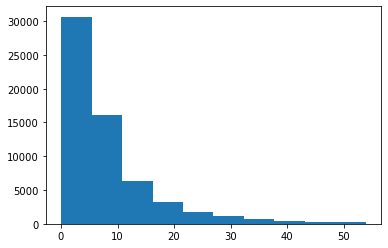

In [361]:
plt.hist(f_df['LOS_days']);

In [362]:
f_df['LOS_days'].describe()

count    61109.000000
mean         8.458117
std          8.253185
min          0.050000
25%          3.250694
50%          5.402778
75%         10.197917
max         53.870833
Name: LOS_days, dtype: float64

## Convert LOS_days to Categorical

In [363]:
# Calculate Tertiles

q1 = f_df['LOS_days'].quantile(q=(1/3))
q2 = f_df['LOS_days'].quantile(q=(2/3))
print(q1)
print(q2)

3.9493364197530854
8.041435185185177


In [364]:
# bin the LOS_days var

LOS = f_df['LOS_days']
m = max(LOS)

bins = [0, 3.9493364197530854, 8.041435185185177, m]
labels=[0, 1, 2]

# 0 - Low/Short Length of Stay
# 1 - Medium Length of Stay
# 2 - High/Long Length of Stay

f_df['LOS_days'] = pd.cut(LOS, bins=bins, labels=labels, include_lowest=True)

In [365]:
f_df['LOS_days'].value_counts()

0    20370
2    20370
1    20369
Name: LOS_days, dtype: int64